# 1. **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/forest-cover-type-dataset/covtype.csv")

# 2. **Data Exploration**

In [3]:
df.shape

(581012, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
df.duplicated().sum()

0

# 3. **Data Preprocessing**

In [9]:
soil_cols = [col for col in df.columns if col.startswith("Soil_Type")]
data_soil = df[soil_cols].idxmax(axis=1).str.replace("Soil_Type", "").astype(int)

In [10]:
df["Soil_Type"] = data_soil

In [11]:
df = df.drop(columns=soil_cols)

In [12]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29


In [13]:
area_cols = [col for col in df.columns if col.startswith("Wilderness_Area")]
data_area = df[area_cols].idxmax(axis=1).str.replace("Wilderness_Area", "").astype(int)

In [14]:
df["Wilderness_Area"] = data_area

In [15]:
df = df.drop(columns=area_cols)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Cover_Type                          581012 non-null  int64
 11  Soil_Type                           581012 non-null 

# 4. **Visualization**

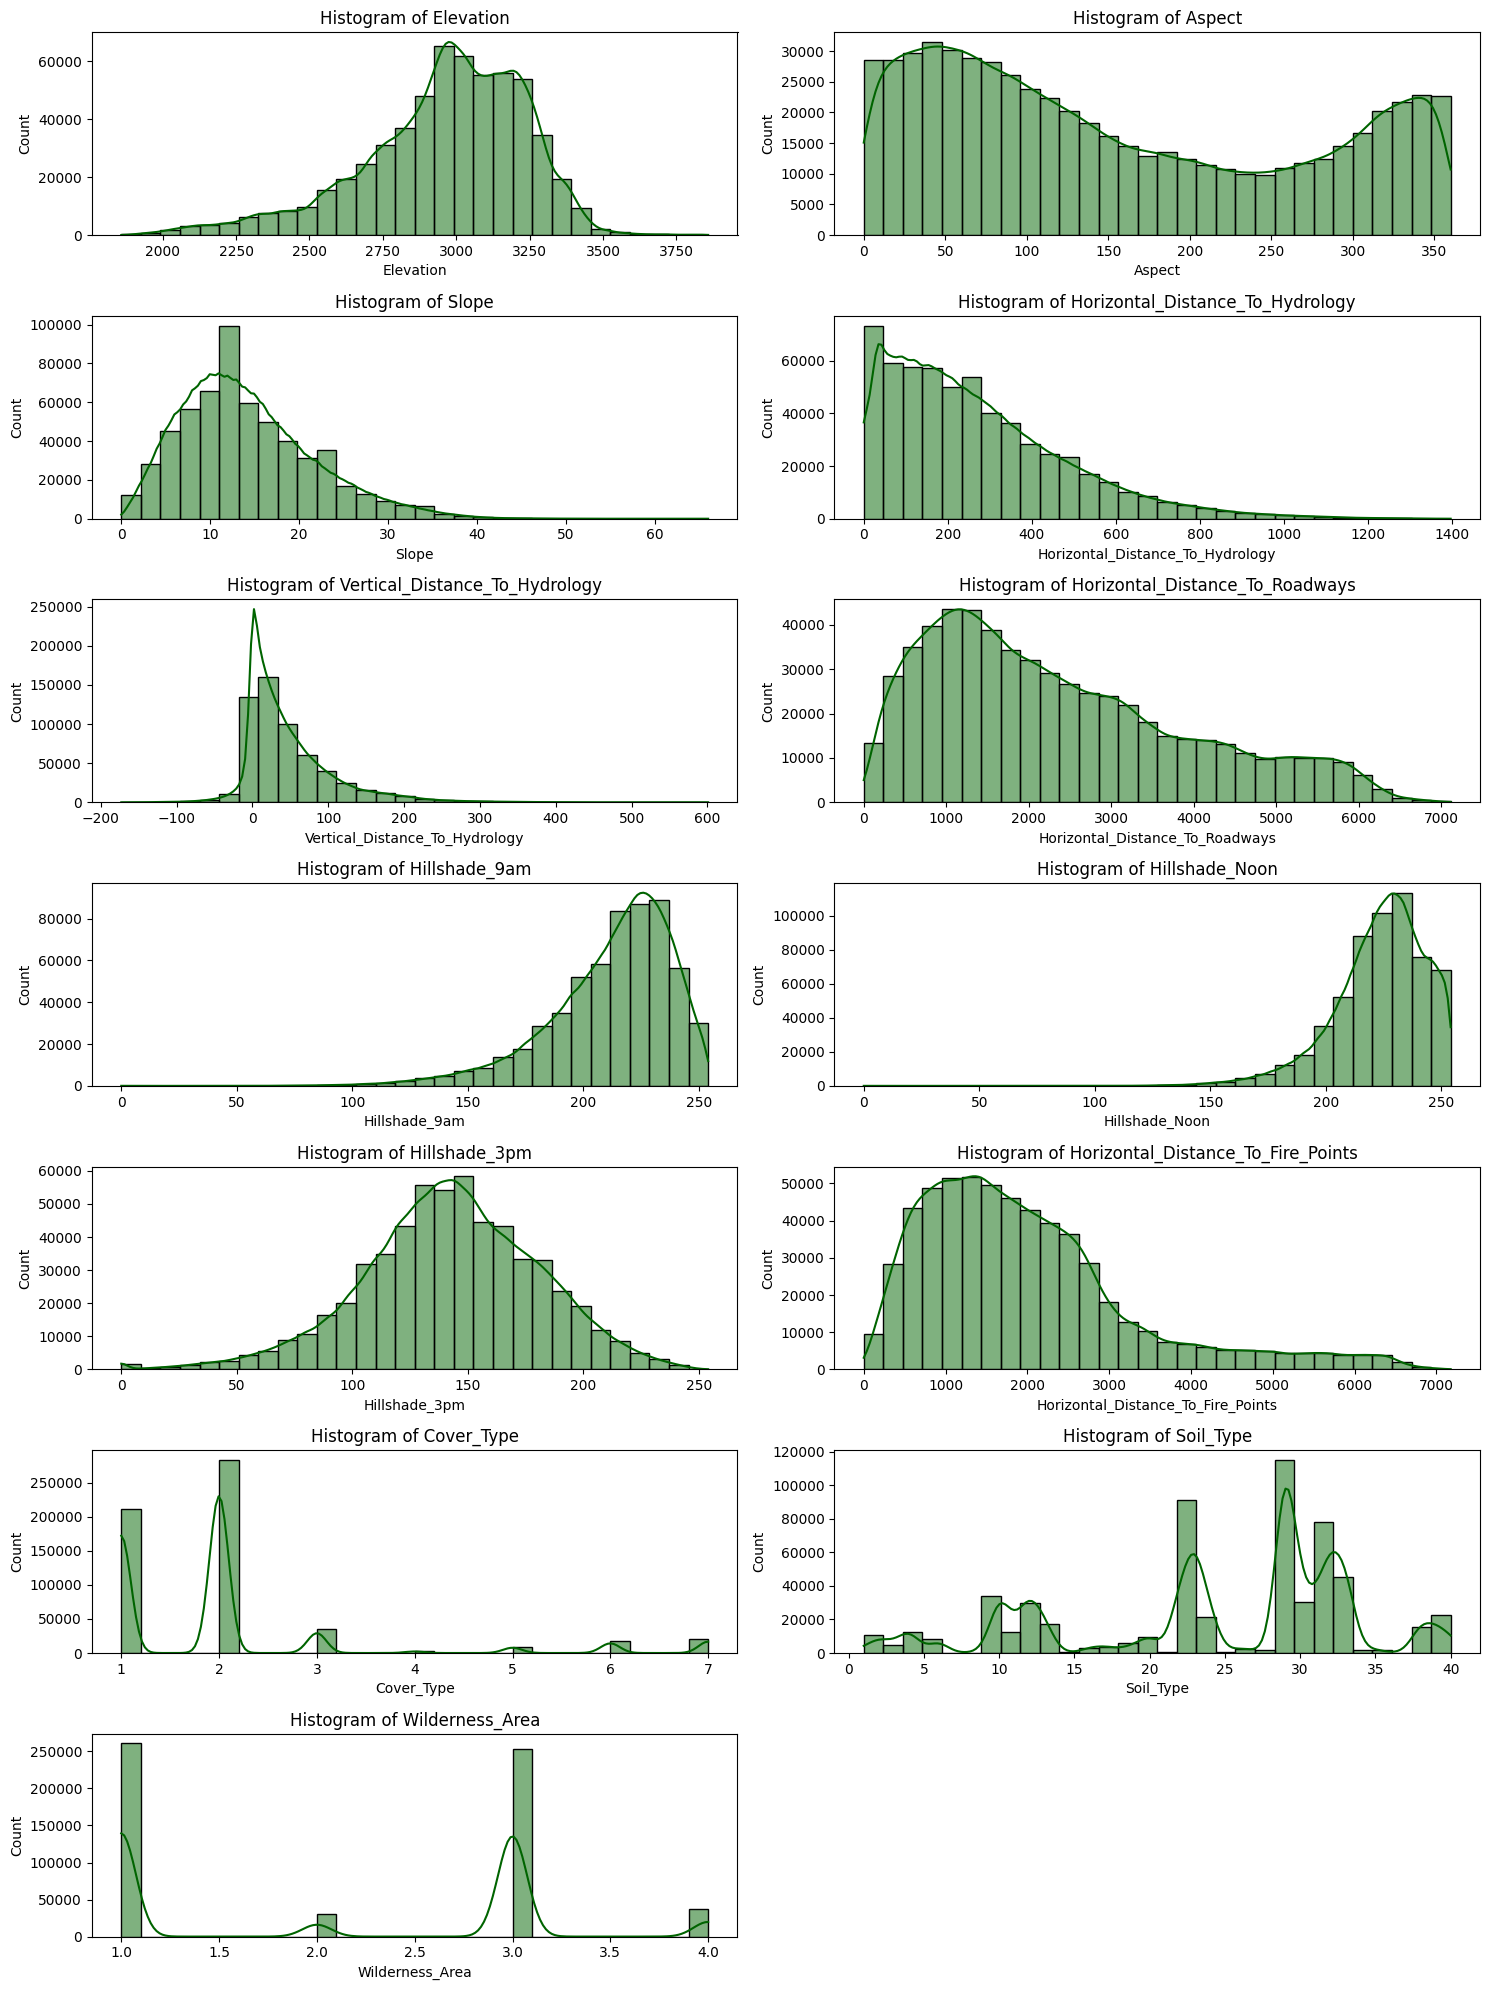

In [17]:
cols = df.columns
n_features = len(cols)
fig, axes = plt.subplots(7, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cols):  
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="darkgreen")
    axes[i].set_title(f"Histogram of {col}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

# 4. **Data Splitting**

In [18]:
X = df.drop(columns=["Cover_Type"])
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CLASSIFICATION MODELS

# 6. **Random Forest, `max_depth = 10`, `n_estimators = 200`**

In [19]:
randomforest = RandomForestClassifier(n_estimators = 200, max_depth=10, random_state=42, class_weight ="balanced")
randomforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [20]:
y_pred_rf = randomforest.predict(X_test)

## 6.1 **Model Evaluation**

In [21]:
acc=accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 71.03%


## 6.2 **Classification Report**

In [22]:
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           1       0.74      0.77      0.75     63556
           2       0.85      0.62      0.72     85078
           3       0.78      0.78      0.78     10638
           4       0.52      0.95      0.67       795
           5       0.18      0.93      0.31      2941
           6       0.48      0.85      0.61      5227
           7       0.59      0.94      0.72      6069

    accuracy                           0.71    174304
   macro avg       0.59      0.83      0.65    174304
weighted avg       0.77      0.71      0.73    174304



## 6.3 **Confusion Matrix**

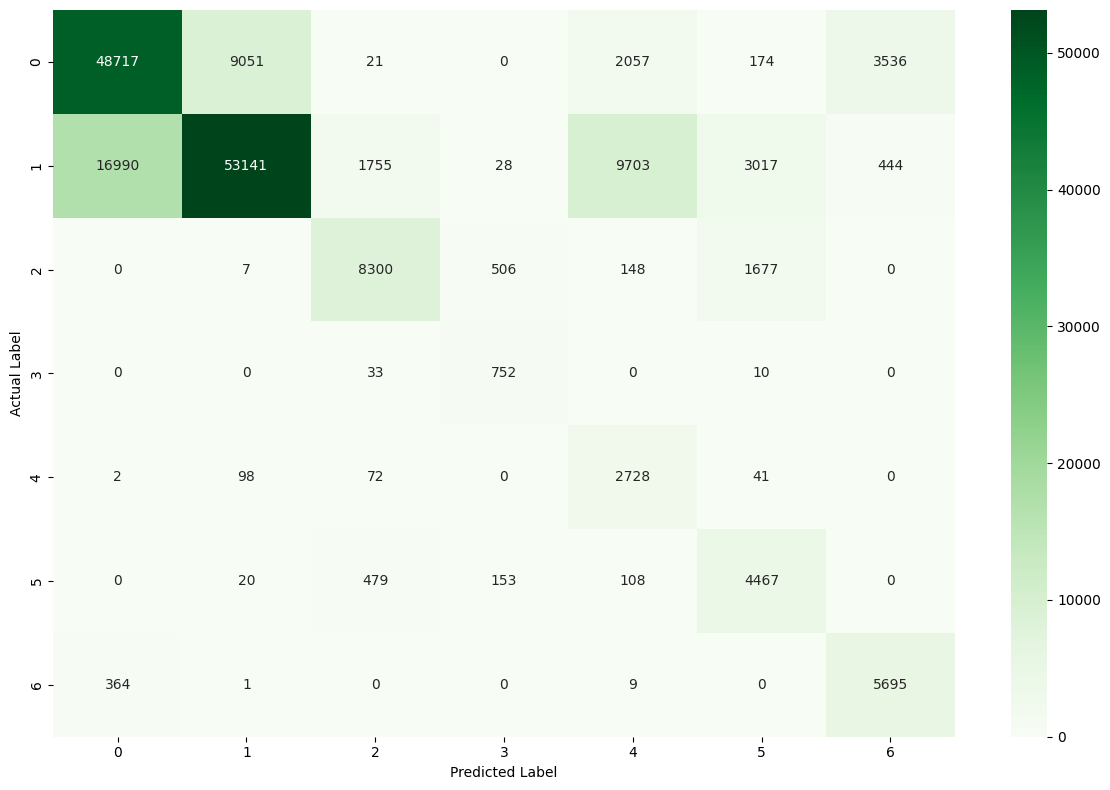

In [23]:
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

## 6.4 **Feature Importance**

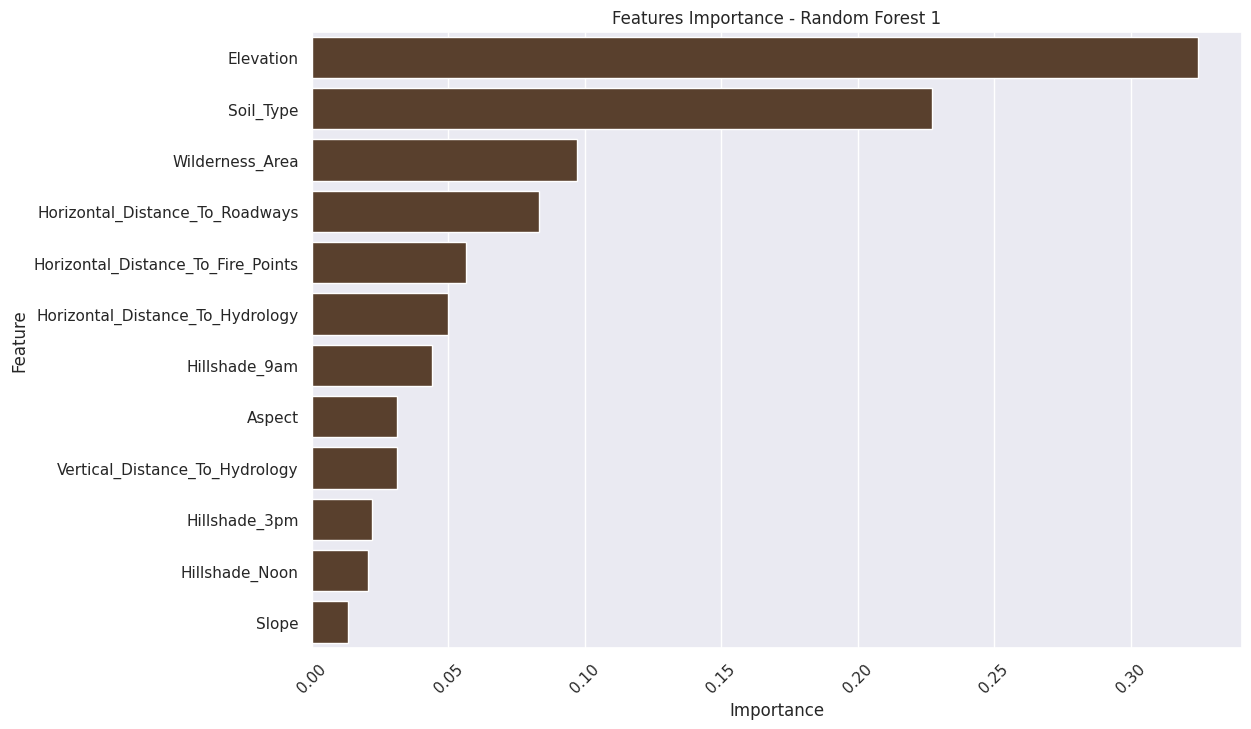

----------------------------------------------------------------------------------------------------------------------------------
                               Feature  Importance
0                            Elevation    0.324569
10                           Soil_Type    0.227316
11                     Wilderness_Area    0.096998
5      Horizontal_Distance_To_Roadways    0.083074
9   Horizontal_Distance_To_Fire_Points    0.056446
3     Horizontal_Distance_To_Hydrology    0.049896
6                        Hillshade_9am    0.043951
1                               Aspect    0.031126
4       Vertical_Distance_To_Hydrology    0.031089
8                        Hillshade_3pm    0.021874
7                       Hillshade_Noon    0.020524
2                                Slope    0.013136


In [24]:
importance_rf = randomforest.feature_importances_
importance_rf_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance_rf})
importance_rf_df = importance_rf_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
ax = sns.barplot(importance_rf_df, y="Feature", x="Importance", color="#603F26")
plt.xticks(rotation=45)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features Importance - Random Forest 1")
plt.show()
print("-"*130)
print(importance_rf_df)

# 7. **Random Forest Fine Tuning: `max_depth = 30`, `n_estimators = 300`**

In [25]:
randomforest2 = RandomForestClassifier(n_estimators = 300, max_depth=30, 
                                       random_state=42, class_weight="balanced", n_jobs=-1)
randomforest2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [26]:
y_pred_rf2 = randomforest2.predict(X_test)

## 7.1 **Model Evaluation**

In [27]:
acc=accuracy_score(y_test, y_pred_rf2)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 96.11%


## 7.2 **Confusion Matrix**

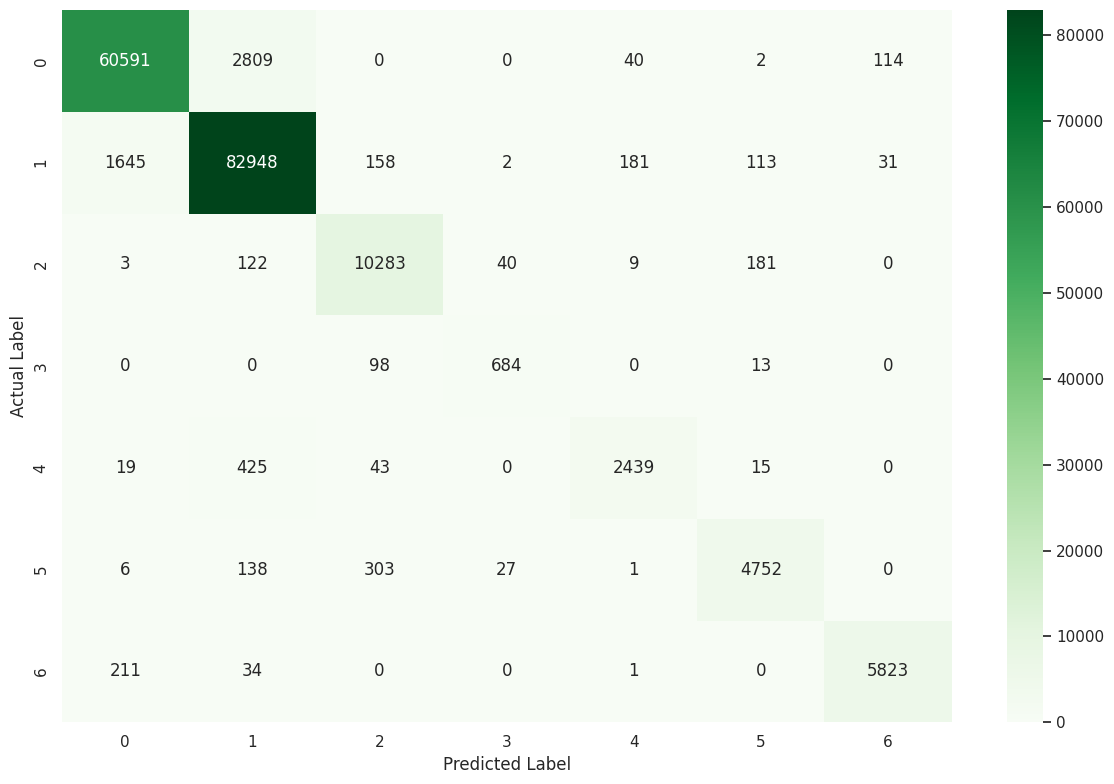

In [28]:
cm = confusion_matrix(y_test, y_pred_rf2)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

## 7.3 **Classification Report**

In [29]:
cr2 = classification_report(y_test, y_pred_rf2)
print(cr2)

              precision    recall  f1-score   support

           1       0.97      0.95      0.96     63556
           2       0.96      0.97      0.97     85078
           3       0.94      0.97      0.96     10638
           4       0.91      0.86      0.88       795
           5       0.91      0.83      0.87      2941
           6       0.94      0.91      0.92      5227
           7       0.98      0.96      0.97      6069

    accuracy                           0.96    174304
   macro avg       0.94      0.92      0.93    174304
weighted avg       0.96      0.96      0.96    174304



## 7.4 **Feature Importance**

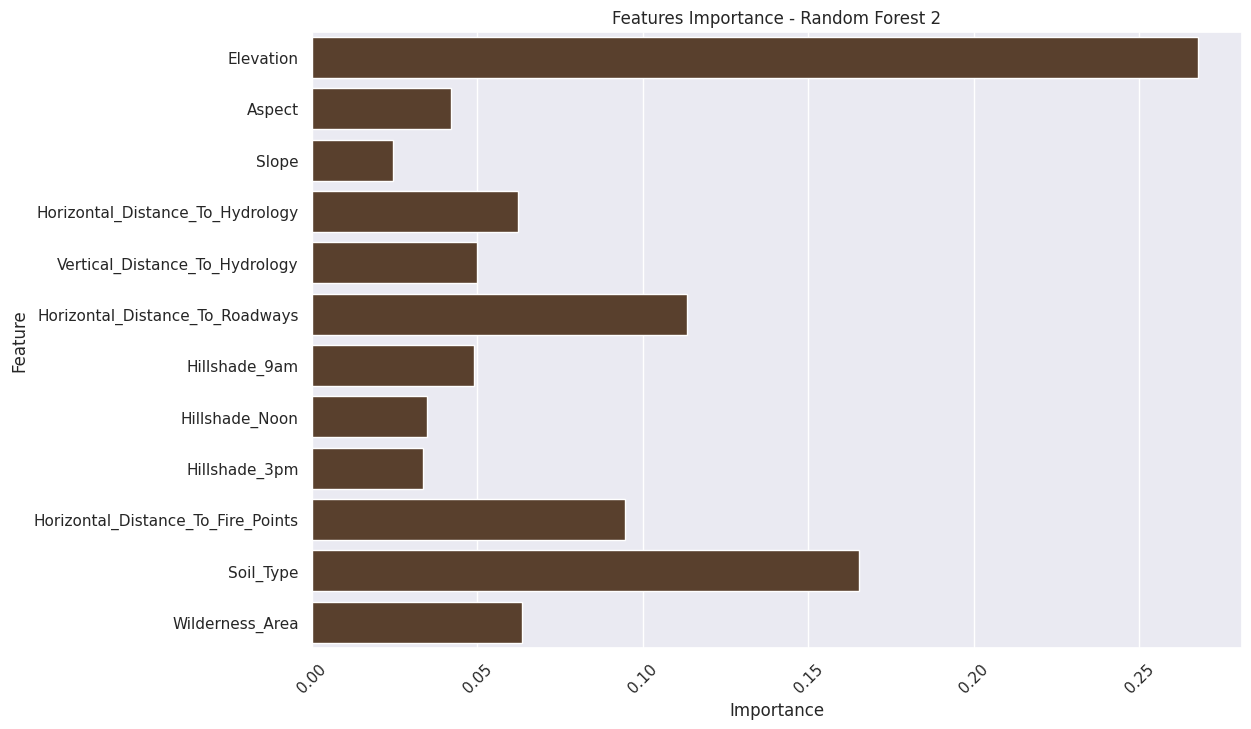

----------------------------------------------------------------------------------------------------------------------------------
                               Feature  Importance
0                            Elevation    0.267593
1                               Aspect    0.042128
2                                Slope    0.024607
3     Horizontal_Distance_To_Hydrology    0.062222
4       Vertical_Distance_To_Hydrology    0.049824
5      Horizontal_Distance_To_Roadways    0.113188
6                        Hillshade_9am    0.048860
7                       Hillshade_Noon    0.034677
8                        Hillshade_3pm    0.033568
9   Horizontal_Distance_To_Fire_Points    0.094753
10                           Soil_Type    0.165245
11                     Wilderness_Area    0.063337


In [30]:
importance_rf2 = randomforest2.feature_importances_
importance_rf_df2 = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance_rf2})

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
ax = sns.barplot(importance_rf_df2, y="Feature", x="Importance", color="#603F26")
plt.xticks(rotation=45)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features Importance - Random Forest 2")
plt.show()
print("-"*130)
print(importance_rf_df2)

# 8. **Decision Tree `max_depth = 25`**

In [31]:
decisiontree = DecisionTreeClassifier(max_depth = 25, criterion="entropy", class_weight="balanced", random_state=42)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=25, random_state=42)

## 8.1 **Model Evaluation**

In [32]:
y_pred_dt = decisiontree.predict(X_test)

In [33]:
acc=accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 93.45%


## 8.2 **Classification Report**

In [34]:
cr3 = classification_report(y_test, y_pred_dt)
print(cr3)

              precision    recall  f1-score   support

           1       0.93      0.94      0.94     63556
           2       0.94      0.94      0.94     85078
           3       0.92      0.92      0.92     10638
           4       0.83      0.84      0.84       795
           5       0.80      0.83      0.82      2941
           6       0.87      0.86      0.86      5227
           7       0.96      0.95      0.95      6069

    accuracy                           0.93    174304
   macro avg       0.89      0.90      0.90    174304
weighted avg       0.93      0.93      0.93    174304



## 8.3 **Confusion Matrix**

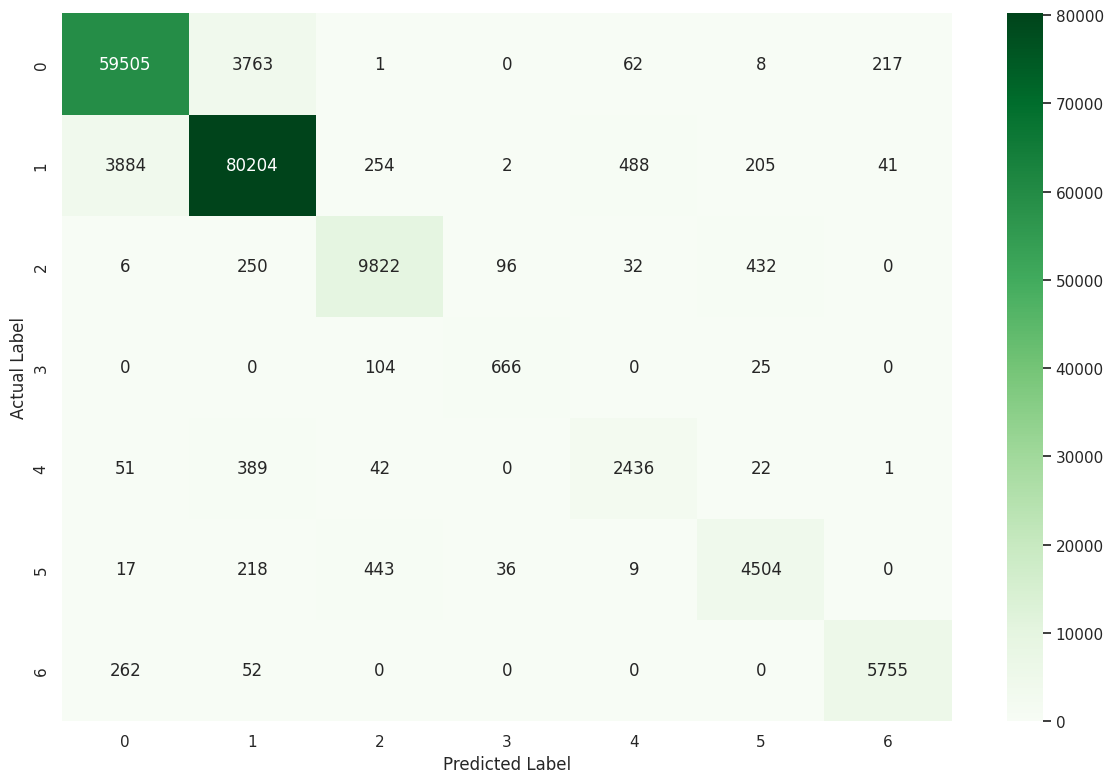

In [35]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

## 8.4 **Feature Importance**

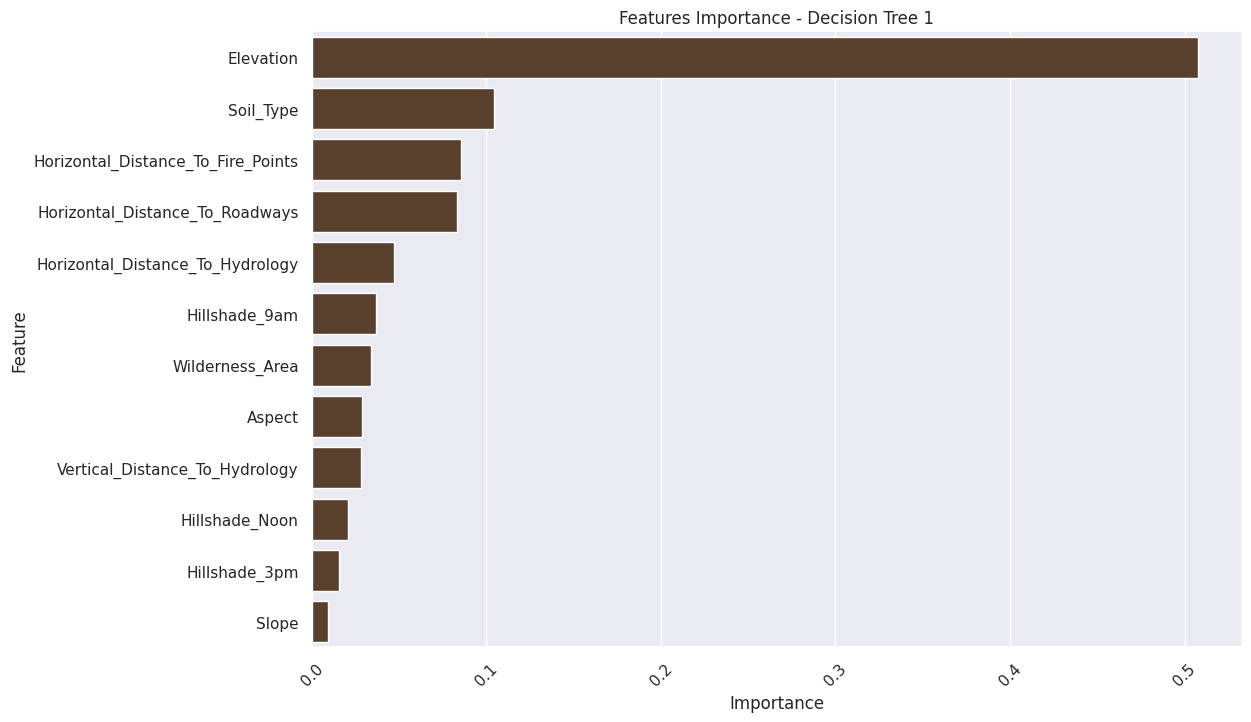

----------------------------------------------------------------------------------------------------------------------------------
                               Feature  Importance
0                            Elevation    0.507484
10                           Soil_Type    0.104131
9   Horizontal_Distance_To_Fire_Points    0.085268
5      Horizontal_Distance_To_Roadways    0.083250
3     Horizontal_Distance_To_Hydrology    0.046878
6                        Hillshade_9am    0.036679
11                     Wilderness_Area    0.033658
1                               Aspect    0.028920
4       Vertical_Distance_To_Hydrology    0.028241
7                       Hillshade_Noon    0.020833
8                        Hillshade_3pm    0.015558
2                                Slope    0.009100


In [36]:
importance_dt = decisiontree.feature_importances_
importance_dt_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance_dt})
importance_dt_df = importance_dt_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
ax = sns.barplot(importance_dt_df, y="Feature", x="Importance", color="#603F26")
plt.xticks(rotation=45)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features Importance - Decision Tree 1")
plt.show()
print("-"*130)
print(importance_dt_df)

# 9. **Decision Tree Fine Tuning: `max_depth = 35`**

In [37]:
decisiontree2 = DecisionTreeClassifier(max_depth = 35, criterion="entropy", 
                                       class_weight="balanced", random_state=42)
decisiontree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=35, random_state=42)

## 9.1 **Model Evaluation**

In [38]:
y_pred_dt2 = decisiontree2.predict(X_test)

In [39]:
acc=accuracy_score(y_test, y_pred_dt2)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 93.70%


## 9.2 **Classification Report**

In [40]:
cr4 = classification_report(y_test, y_pred_dt2)
print(cr4)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     63556
           2       0.95      0.95      0.95     85078
           3       0.92      0.93      0.92     10638
           4       0.84      0.83      0.83       795
           5       0.85      0.81      0.83      2941
           6       0.87      0.85      0.86      5227
           7       0.96      0.95      0.95      6069

    accuracy                           0.94    174304
   macro avg       0.90      0.89      0.90    174304
weighted avg       0.94      0.94      0.94    174304



## 9.3 **Confusion Matrix**

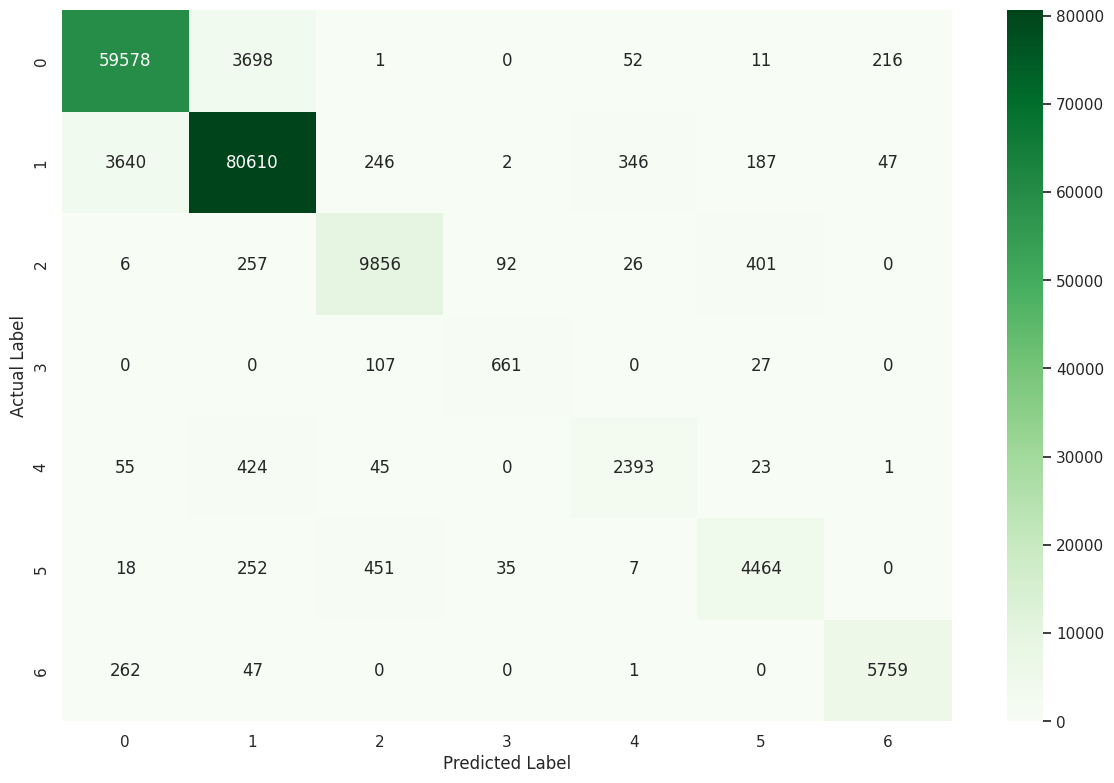

In [41]:
cm = confusion_matrix(y_test, y_pred_dt2)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

## 9.4 **Feature Importance**

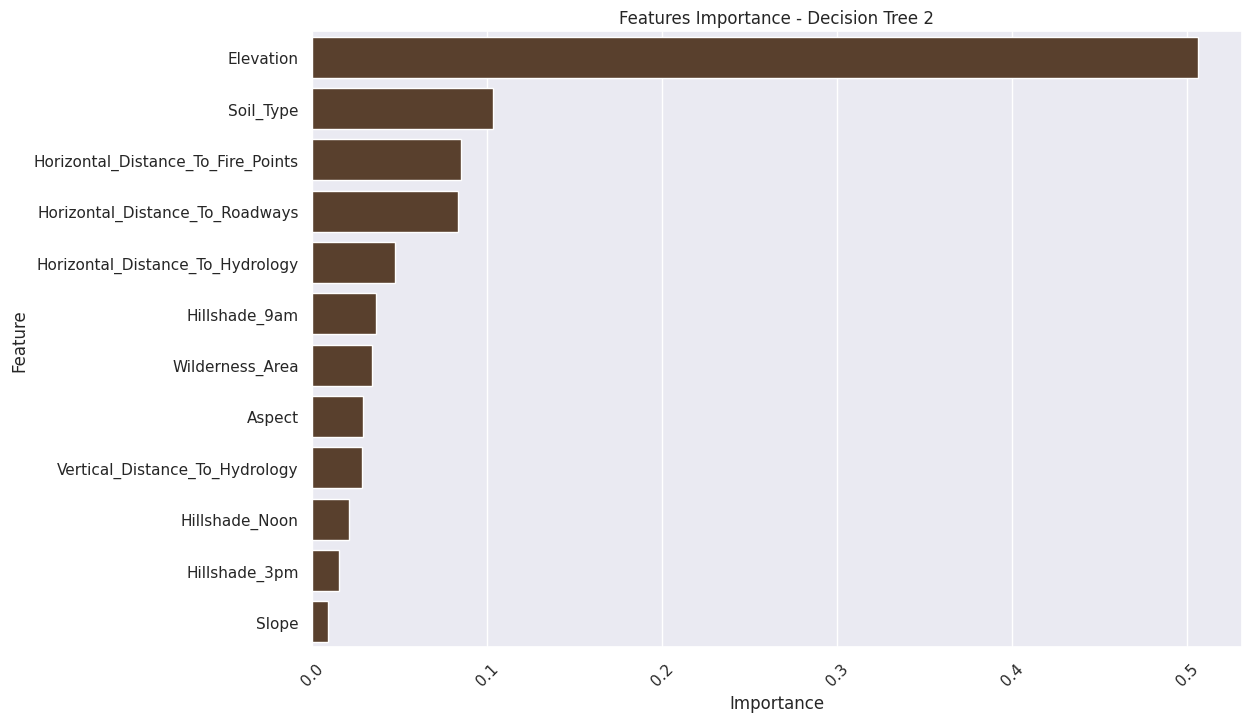

----------------------------------------------------------------------------------------------------------------------------------
                               Feature  Importance
0                            Elevation    0.505999
10                           Soil_Type    0.103509
9   Horizontal_Distance_To_Fire_Points    0.085405
5      Horizontal_Distance_To_Roadways    0.083392
3     Horizontal_Distance_To_Hydrology    0.047337
6                        Hillshade_9am    0.036520
11                     Wilderness_Area    0.034115
1                               Aspect    0.029369
4       Vertical_Distance_To_Hydrology    0.028413
7                       Hillshade_Noon    0.021067
8                        Hillshade_3pm    0.015476
2                                Slope    0.009399


In [42]:
importance_dt2 = decisiontree2.feature_importances_
importance_dt_df2 = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance_dt2})
importance_dt_df2 = importance_dt_df2.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(12, 8))
sns.set_theme(style="darkgrid")
ax = sns.barplot(importance_dt_df2, y="Feature", x="Importance", color="#603F26")
plt.xticks(rotation=45)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features Importance - Decision Tree 2")
plt.show()
print("-"*130)
print(importance_dt_df2)

# 10. **XGBoost `n_estimators = 200`, `max_depth = 10`, `lr = 0.1`**

#### - Since the XGBoost Classifier expects labels to strat at 0, we will shift the labels down by 1

In [43]:
y_train_xgbc = y_train - 1
y_test_xgbc = y_test - 1

In [44]:
xbgc1 = XGBClassifier(n_estimators=200, max_depth=10, n_jobs=-1, learning_rate=0.1, random_state=42)
xbgc1.fit(X_train, y_train_xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
y_pred_xgb1 = xbgc1.predict(X_test) + 1 #shift back up

## 10.1 **Model Evalution**

In [46]:
acc=accuracy_score(y_test, y_pred_xgb1)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 93.70%


## 10.2 **Classification Report**

In [47]:
cr5 = classification_report(y_test, y_pred_xgb1)
print(cr5)

              precision    recall  f1-score   support

           1       0.94      0.92      0.93     63556
           2       0.93      0.95      0.94     85078
           3       0.95      0.96      0.95     10638
           4       0.92      0.88      0.90       795
           5       0.92      0.77      0.84      2941
           6       0.92      0.91      0.91      5227
           7       0.97      0.96      0.97      6069

    accuracy                           0.94    174304
   macro avg       0.94      0.91      0.92    174304
weighted avg       0.94      0.94      0.94    174304



## 10.3 **Confusion Matrix**

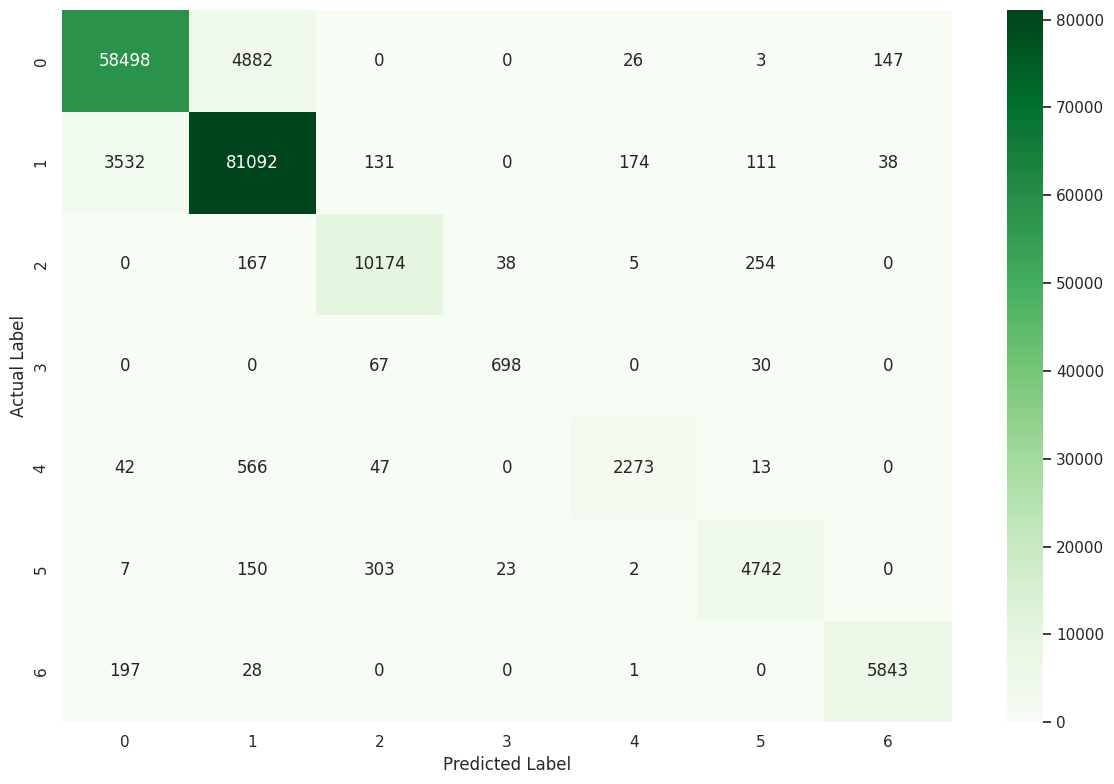

In [48]:
cm = confusion_matrix(y_test, y_pred_xgb1)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# 11. **XGBoost Fine Tuning: `n_estimators = 300`, `max_depth = 25`, `lr = 0.01`**

In [49]:
xbgc2 = XGBClassifier(n_estimators=300, max_depth=25, n_jobs=-1, learning_rate=0.01, random_state=42)
xbgc2.fit(X_train, y_train_xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [50]:
y_pred_xgb2 = xbgc2.predict(X_test)+1

## 11.1 **Model Evaluation**

In [51]:
acc=accuracy_score(y_test, y_pred_xgb2)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 96.56%


## 11.2 **Classification Report**

In [52]:
cr6 = classification_report(y_test, y_pred_xgb2)
print(cr6)

              precision    recall  f1-score   support

           1       0.97      0.96      0.97     63556
           2       0.97      0.98      0.97     85078
           3       0.95      0.97      0.96     10638
           4       0.91      0.86      0.88       795
           5       0.93      0.84      0.88      2941
           6       0.94      0.93      0.93      5227
           7       0.97      0.96      0.97      6069

    accuracy                           0.97    174304
   macro avg       0.95      0.93      0.94    174304
weighted avg       0.97      0.97      0.97    174304



## 11.3 **Confusion Matrix**

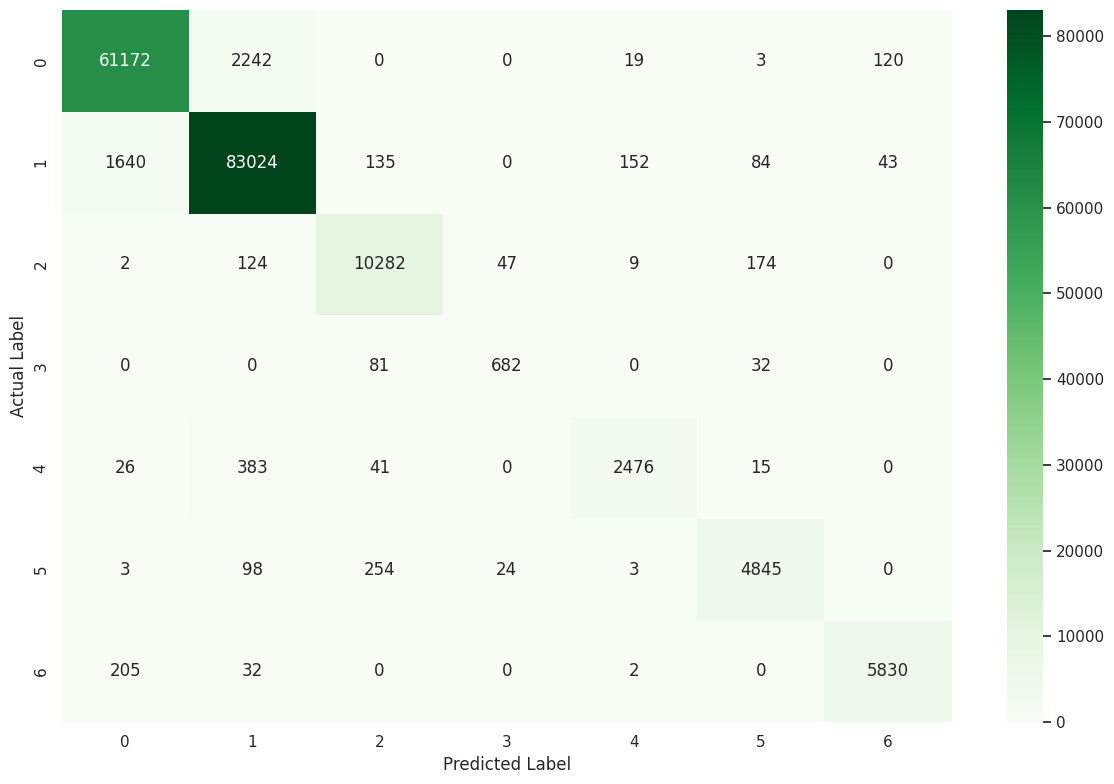

In [53]:
cm = confusion_matrix(y_test, y_pred_xgb2)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# 12. **Models Comparison**

In [54]:
models = {"Random Forest (max_depth = 10)":(y_test, y_pred_rf),
          "Random Forest (max_depth = 30)":(y_test, y_pred_rf2),
          "Decision Tree (max_depth = 25)":(y_test, y_pred_dt),
          "Decision Tree (max_depth = 35)":(y_test, y_pred_dt2),
          "XGBoost Classifier (lr = 0.1, n_est=200, max_depth=10)":(y_test, y_pred_xgb1),
          "XGBoost Classifier (lr = 0.01, n_est=300, max_depth=25)":(y_test, y_pred_xgb2)}

results = []

for model, (y_test, y_pred) in models.items():
    report = cr1_dict = classification_report(y_test, y_pred, output_dict=True)
    acc_score = accuracy_score(y_test, y_pred)
    results.append({
        "Model":model, 
        "Accuracy %":round(accuracy_score(y_test,y_pred)*100, 2),
        "Precision Score (Wighted)": round(precision_score(y_test, y_pred, average="weighted"),2),
        "Recall Score (Wighted)": round(recall_score(y_test, y_pred, average="weighted"), 2),
        "Precision Score (Macro)": round(precision_score(y_test, y_pred, average="macro"), 2),
        "Recall Score (Macro)": round(recall_score(y_test, y_pred, average="macro"),2)
    })

models_df = pd.DataFrame(results)
models_df = models_df.sort_values(by="Accuracy %", ascending=False).reset_index(drop=True)
models_df

,Model,Accuracy %,Precision Score (Wighted),Recall Score (Wighted),Precision Score (Macro),Recall Score (Macro)
0,"XGBoost Classifier (lr = 0.01, n_est=300, max_...",96.56,0.97,0.97,0.95,0.93
1,Random Forest (max_depth = 30),96.11,0.96,0.96,0.94,0.92
2,"XGBoost Classifier (lr = 0.1, n_est=200, max_d...",93.70,0.94,0.94,0.94,0.91
3,Decision Tree (max_depth = 35),93.70,0.94,0.94,0.90,0.89
4,Decision Tree (max_depth = 25),93.45,0.93,0.93,0.89,0.90
5,Random Forest (max_depth = 10),71.03,0.77,0.71,0.59,0.83
